In [369]:
import numpy as np
import pandas as pd
import json
import pprint
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [363]:
# Generate businesses
!python main.py -b 1000

In [364]:
# Load the dataset
with open('business.json') as f:
     data = json.load(f)

# Print example dataset
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(data['bus_id_4'])

{'bus_id': 4,
 'bus_risk_factor': 2,
 'claim_amount': 0,
 'claim_count': 0,
 'payroll': 1249097,
 'project_count': 12,
 'projects': {'proj_id_32': {'bus_id': 4,
                             'bus_risk_factor': 2,
                             'claim_amount': nan,
                             'is_claim': False,
                             'payroll': 102215,
                             'project_id': 32,
                             'project_risk_factor': 3},
              'proj_id_33': {'bus_id': 4,
                             'bus_risk_factor': 2,
                             'claim_amount': nan,
                             'is_claim': False,
                             'payroll': 120964,
                             'project_id': 33,
                             'project_risk_factor': 2},
              'proj_id_34': {'bus_id': 4,
                             'bus_risk_factor': 2,
                             'claim_amount': nan,
                             'is_claim': False,
      

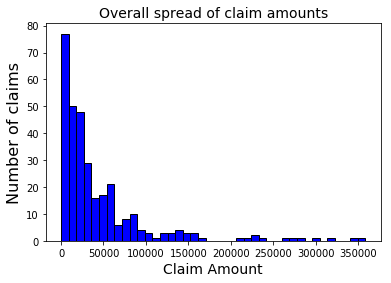

TypeError: only integer scalar arrays can be converted to a scalar index

In [378]:
claim_amounts = list()

for key in data: 
    for k in data[key]['projects']:
        claim_amounts.append(data[key]['projects'][k]['claim_amount'])        

plt.hist(claim_amounts, bins = 40, color = 'blue', edgecolor = 'black')
plt.title('Overall spread of claim amounts',fontsize=14)
plt.xlabel('Claim Amount',fontsize=14)
plt.ylabel('Number of claims',fontsize=16)
plt.show()

#claim_amounts = claim_amounts[~np.isnan(claim_amounts)]
print(claim_amounts[~np.isnan(claim_amounts)])
print('Total claim amount: {:,}'.format((int(np.nansum(claim_amounts)))))
print('Average claim amount: {:,}'.format(statistics.median(claim_amounts)))

In [366]:
project_list = list()

for key in data: 
    for k in data[key]['projects']:
        project_list.append(data[key]['projects'][k])
        
df_projects = pd.DataFrame(project_list)
df_projects.head(5)

,bus_id,bus_risk_factor,claim_amount,is_claim,payroll,project_id,project_risk_factor
0,0,1,NaN,False,99320,0,1
1,0,1,NaN,False,51200,1,1
2,0,1,NaN,False,77521,2,3
3,0,1,NaN,False,113069,3,3
4,0,1,NaN,False,60780,4,2


Risk factor: 1, claims(%): 0.000%, projects: 848, claims: 0, claim amount: 0.0, average claim: 1
Risk factor: 2, claims(%): 0.000%, projects: 719, claims: 0, claim amount: 0.0, average claim: 1
Risk factor: 3, claims(%): 0.000%, projects: 801, claims: 0, claim amount: 0.0, average claim: 1
Risk factor: 4, claims(%): 0.000%, projects: 701, claims: 0, claim amount: 0.0, average claim: 1
Risk factor: 5, claims(%): 0.245%, projects: 815, claims: 2, claim amount: 84,481.0, average claim: 1
Risk factor: 6, claims(%): 0.252%, projects: 793, claims: 2, claim amount: 15,777.0, average claim: 1
Risk factor: 7, claims(%): 2.796%, projects: 894, claims: 25, claim amount: 1,595,448.0, average claim: 1
Risk factor: 8, claims(%): 4.230%, projects: 851, claims: 36, claim amount: 1,441,079.0, average claim: 1
Risk factor: 9, claims(%): 10.811%, projects: 888, claims: 96, claim amount: 4,824,976.0, average claim: 1
Risk factor: 10, claims(%): 18.968%, projects: 833, claims: 158, claim amount: 6,005,950.

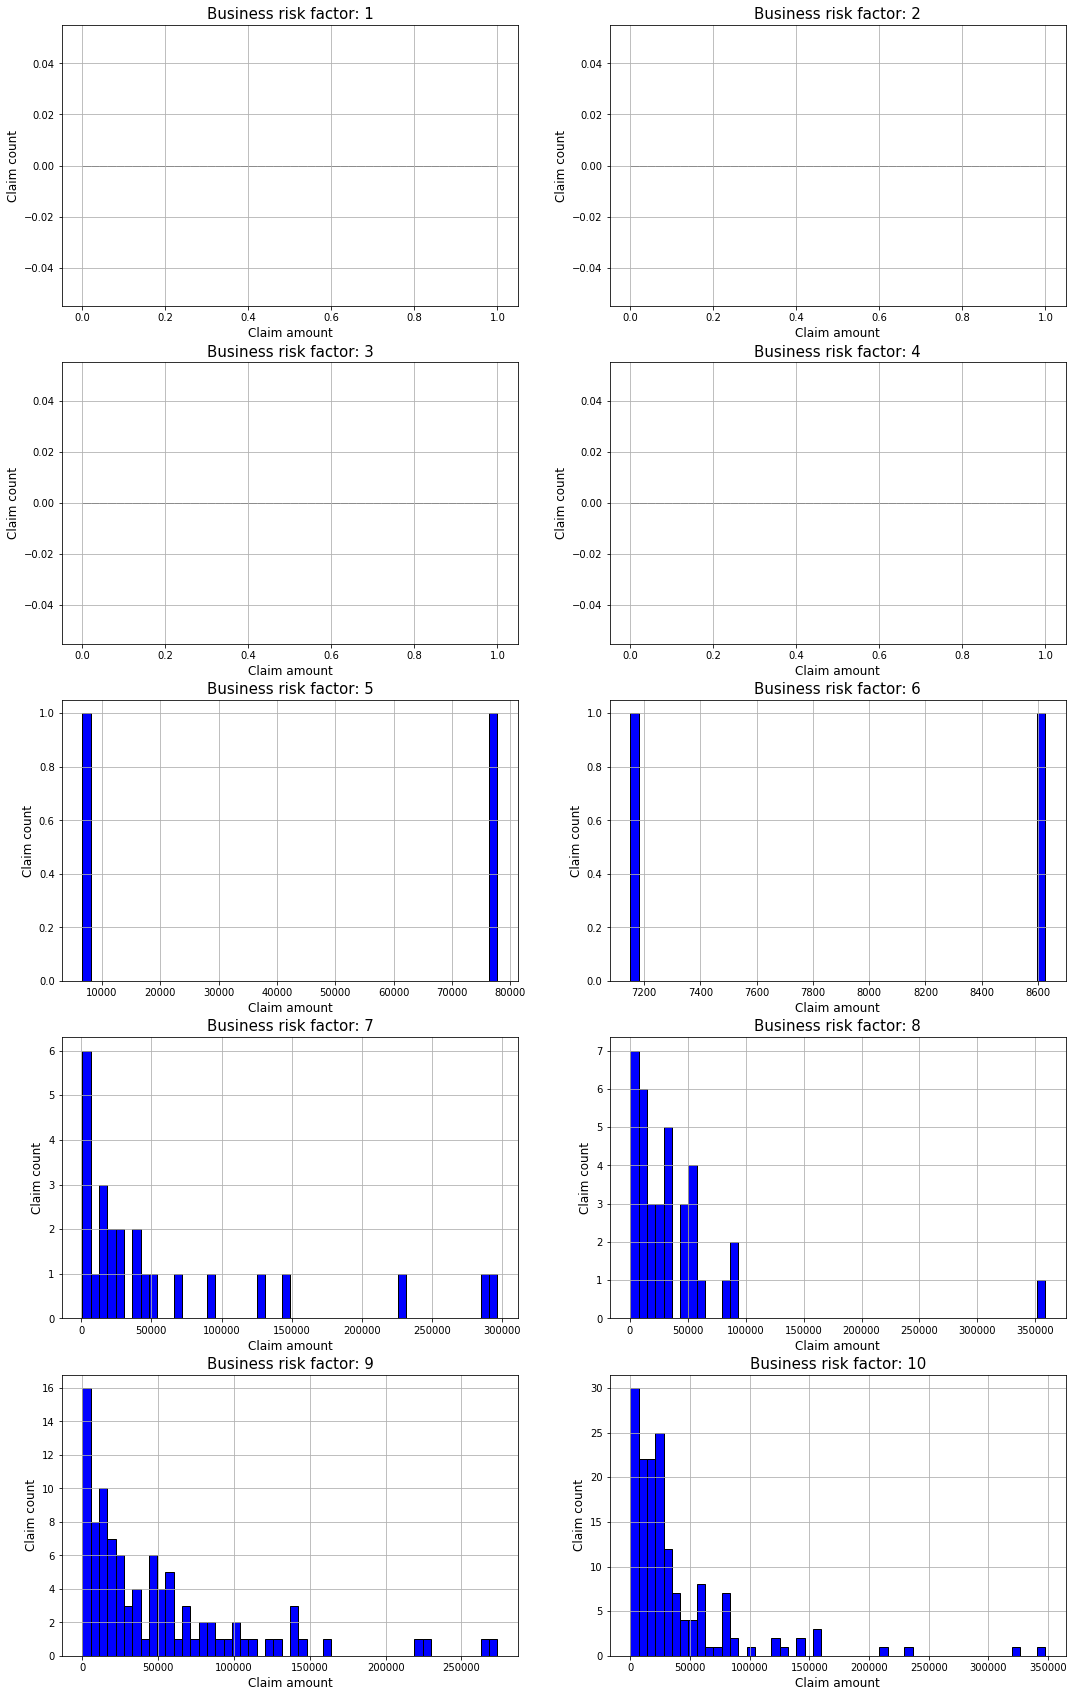

In [367]:
fig=plt.figure(figsize=(18, 30))

claims_list = list()

for i in range(1,11):
    
    
    total_projects = df_projects[df_projects['bus_risk_factor']==i]['bus_id'].count()
    total_claim_amount = df_projects[df_projects['bus_risk_factor']==i]['claim_amount'].sum(skipna=True)
    total_claims = df_projects[df_projects['bus_risk_factor']==i]['is_claim'].sum(skipna=True)
    average_claim = 1 #int(total_claim_amount / total_claims)
    claim_pct = total_claims / total_projects
    claims_list.append(claim_pct)
    
    ax = plt.subplot(5, 2, i)
    ax.set_title('Business risk factor: {}'.format(i), size=15)
    ax.set_xlabel('Claim amount', size = 12)
    ax.set_ylabel('Claim count', size= 12)
    
    df_projects[df_projects['bus_risk_factor']==i]['claim_amount'].hist(bins = 50,color = 'blue', edgecolor = 'black')
    #ax.set_ylim((0,total_projects))

    print('Risk factor: {}, claims(%): {:0.3%}, projects: {}, claims: {}, claim amount: {:,}, average claim: {:,}'.\
          format(i, claim_pct, total_projects, total_claims, total_claim_amount, average_claim))

print(sum(claims_list)/len(claims_list))

In [356]:
fig=plt.figure(figsize=(18, 30))
               
for i in range(1,11):
    
    
    total_projects = df_projects[df_projects['project_risk_factor']==i]['bus_id'].count()
    total_claim_amount = df_projects[df_projects['project_risk_factor']==i]['claim_amount'].sum()
    total_claims = df_projects[df_projects['project_risk_factor']==i]['is_claim'].sum()
    average_claim = int(total_claim_amount / total_claims)
    claim_pct = total_claims / total_projects
    
    ax = plt.subplot(5, 2, i)
    ax.set_title('Project risk factor: {}'.format(i), size=15)
    ax.set_xlabel('Claim amount', size = 12)
    ax.set_ylabel('Claim count', size= 12)
    
    df_projects[df_projects['project_risk_factor']==i]['claim_amount'].hist(bins = 100, color = 'red', edgecolor = 'black')
    #ax.set_ylim((0,total_projects))

    print('Risk factor: {}, claims(%): {:.0%}, projects: {}, claims: {}, claim amount: {:,}, average claim: {:,}'.\
          format(i, claim_pct, total_projects, total_claims, total_claim_amount, average_claim))


C:\Users\Miriam\Anaconda3\envs\jones\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


ValueError: cannot convert float NaN to integer

<Figure size 1296x2160 with 0 Axes>